# Project: Predicting Term Deposit Subscription by a client

# Algorithm :Support Vector Machine(SVM)

## Abstract:
Marketing campaigns are characterized by focusing on the customer needs and their 
overall satisfaction. Nevertheless, there are different variables that determine whether a 
marketing campaign will be successful or not. There are certain variables that we need 
to take into consideration when making a marketing campaign.
A Term deposit is a deposit that a bank or a financial institution offers with a fixed rate 
(often better than just opening a deposit account) in which your money will be returned 
back at a specific maturity time.

## Problem Statement:
Predict if a customer subscribes to a term deposits or not, when contacted by a 
marketing agent, by understanding the different features and performing predictive 
analytics

## Dataset Information:
The data is related with direct marketing campaigns of a Portuguese banking 
institution. The marketing campaigns were based on phone calls. Often, more than one 
contact to the same client was required, in order to assess if the product (bank term 
deposit) would be ('yes') or not ('no') subscribed.
The dataset consists of several predictor variables and one target variable, Outcome. 
Predictor variables includes the age, job, marital status, and so on

# Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read The Data Using Pandas

In [12]:
mydata=pd.read_csv('bank-additional-full.csv',sep = ';')
pd.set_option("display.max_columns",50)

In [13]:
mydata

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Sentiment analysis in a variety of forms

# Exploratory Data Analysis (EDA)

# Check the Datatype

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Dataset consists of float64(5), int64(5), object(11) datatypes

# Describe The Dataset

In [5]:
mydata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Check for Null

In [6]:
mydata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Univariate and Bivariate Analysis

# Visualization

# Graph1: Lineplot

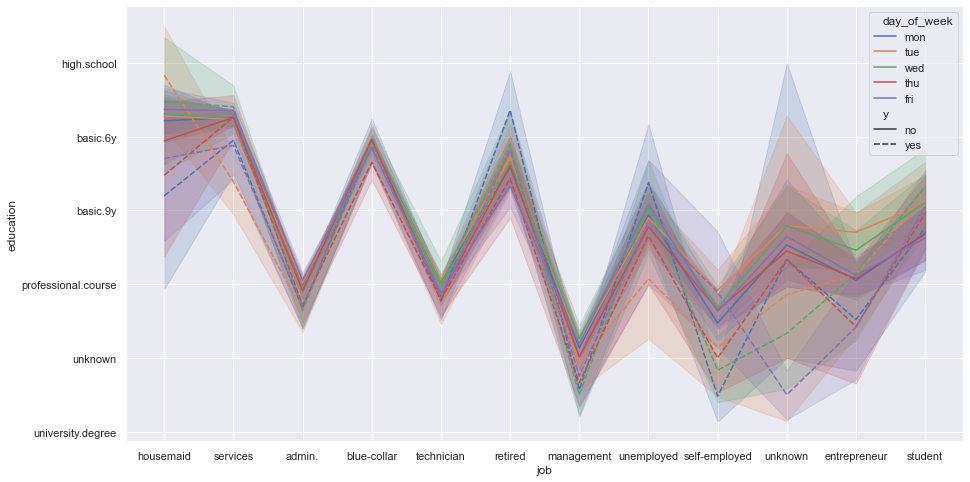

In [7]:
plt.figure(figsize=(15,8))
sns.set_theme(style="darkgrid")
sns.lineplot(x="job", y="education",hue="day_of_week", style="y",data=mydata)
plt.show()

# Graph 2 : Strip Plot

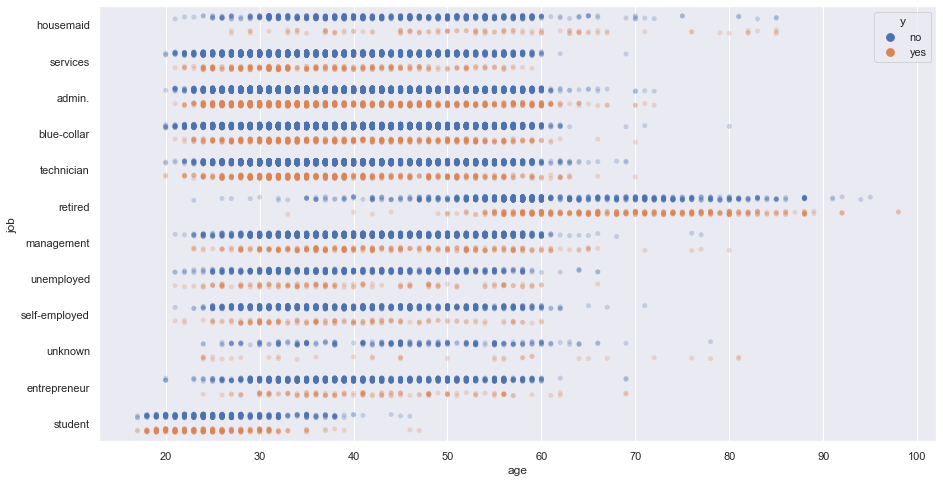

In [8]:
plt.figure(figsize=(15,8))
sns.stripplot(x="age", y="job", hue="y",data=mydata, dodge=True, alpha=.25, zorder=1)
plt.show()

# Graph 3: Histogram Plot

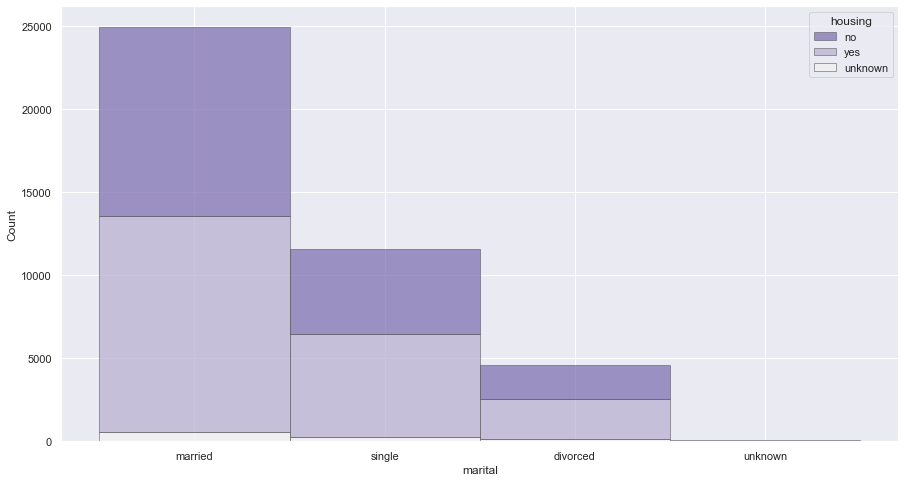

In [9]:
plt.figure(figsize=(15,8))
sns.histplot(mydata,x="marital", hue="housing",multiple="stack",palette="light:m_r",edgecolor=".3",linewidth=.5)
plt.show()

# Graph 4 : Distplot 

<Figure size 1080x576 with 0 Axes>

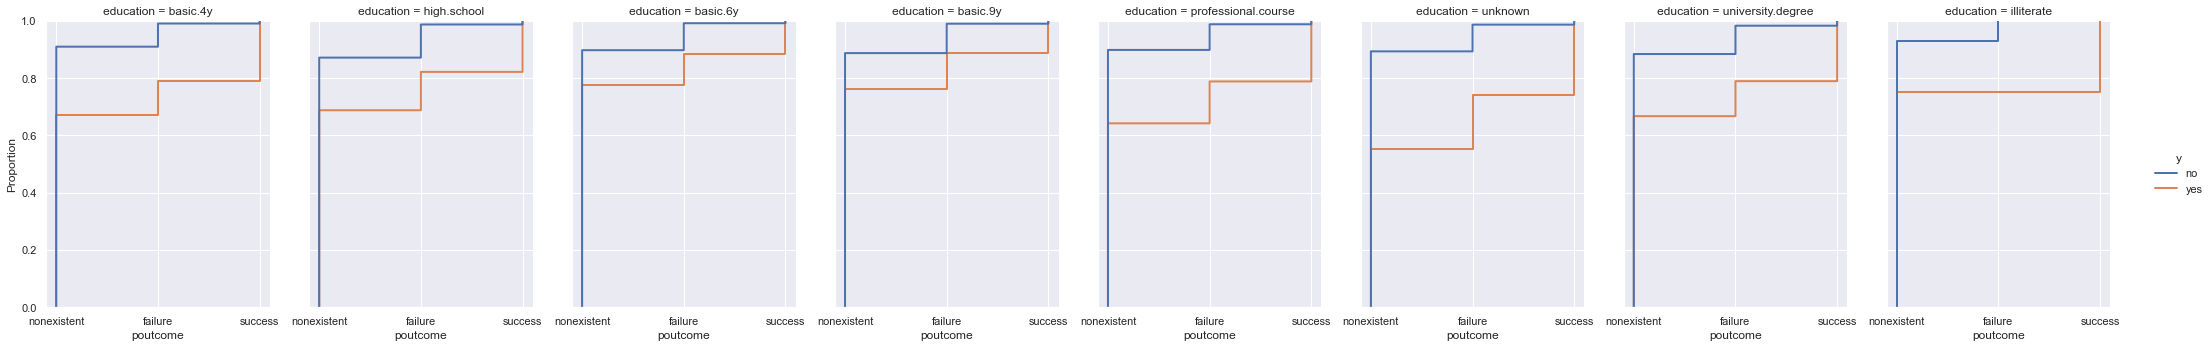

In [10]:
plt.figure(figsize=(15,8))
sns.displot(mydata,x="poutcome", col="education", hue="y",kind="ecdf", aspect=.75, linewidth=2)
plt.show()

# Graph 5 : Multiple bivariate KDE plots

<AxesSubplot:xlabel='cons.price.idx', ylabel='nr.employed'>

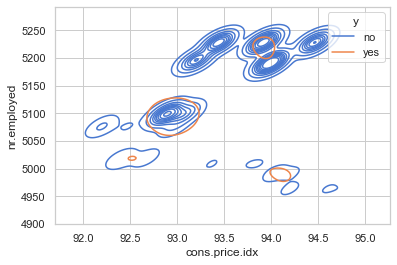

In [36]:
sns.kdeplot(data=mydata,x="cons.price.idx",y="nr.employed",hue="y",thresh=.1)

# Graph 6 : Relplot

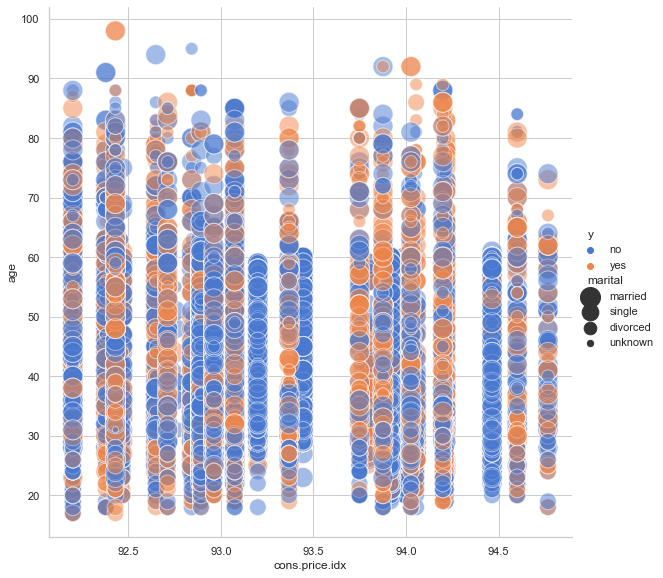

In [32]:
sns.relplot(x="cons.price.idx", y="age", hue="y", size="marital",sizes=(40,400),alpha=.5,palette="muted",height=8,data=mydata)

# Dropping Negative present columns: 

In [43]:
mydata=mydata.drop('emp.var.rate',axis=1)
mydata=mydata.drop('cons.conf.idx',axis=1)

# Data Preprocessing

The data consists of Object type, to convert object to integer, Label Encoder is Used

# Label Encoder

In [37]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [44]:
for i in mydata:
    mydata[i] = LE.fit_transform(mydata[i].astype(str).values)

In [46]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             41188 non-null  int32
 1   job             41188 non-null  int32
 2   marital         41188 non-null  int32
 3   education       41188 non-null  int32
 4   default         41188 non-null  int32
 5   housing         41188 non-null  int32
 6   loan            41188 non-null  int32
 7   contact         41188 non-null  int32
 8   month           41188 non-null  int32
 9   day_of_week     41188 non-null  int32
 10  duration        41188 non-null  int32
 11  campaign        41188 non-null  int32
 12  pdays           41188 non-null  int32
 13  previous        41188 non-null  int32
 14  poutcome        41188 non-null  int32
 15  cons.price.idx  41188 non-null  int32
 16  euribor3m       41188 non-null  int32
 17  nr.employed     41188 non-null  int32
 18  y               41188 non-

The Data Converted to integer DataType

# Correlation

In [47]:
mydata_corr=mydata.corr()
mydata_corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,euribor3m,nr.employed,y
age,1.000000,0.001235,-0.389814,-0.117894,0.164971,-0.001605,-0.007377,0.007054,-0.024927,-0.017570,0.011812,-0.002296,-0.012289,0.024291,0.019727,-0.006061,-0.048040,-0.025658,0.030339
job,0.001235,1.000000,0.027897,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,0.008122,-0.003299,-0.022551,0.020965,0.011504,-0.016589,-0.024999,-0.021910,0.025122
marital,-0.389814,0.027897,1.000000,0.109220,-0.079450,0.010467,0.005788,-0.054501,-0.007629,0.002202,-0.005108,-0.009880,-0.032479,0.038689,0.001912,-0.055996,-0.078735,-0.080046,0.046203
education,-0.117894,0.134121,0.109220,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,0.005463,-0.000840,-0.031610,0.038831,0.017009,-0.081128,-0.057508,-0.036666,0.057799
default,0.164971,-0.028277,-0.079450,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,0.000851,0.029700,0.060522,-0.102416,0.023417,0.165436,0.192971,0.175014,-0.099352
housing,-0.001605,0.006962,0.010467,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.003927,-0.006172,-0.011480,0.021314,-0.011783,-0.078742,-0.041340,-0.036002,0.011552
loan,-0.007377,-0.010209,0.005788,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.000374,0.015360,0.001342,-0.001327,-0.001511,-0.001966,0.005135,0.005483,-0.004909
contact,0.007054,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.016239,0.052292,0.091952,-0.212848,0.118744,0.584524,0.273937,0.175940,-0.144773
month,-0.024927,-0.033213,-0.007629,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,-0.006256,-0.044509,-0.028017,0.103157,-0.065012,-0.006372,-0.197147,-0.266983,-0.006065
day_of_week,-0.017570,-0.000844,0.002202,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.001849,-0.056727,-0.009600,-0.004102,0.018732,0.002174,0.023488,0.023271,0.015967


# Correlogram

# Heatmap

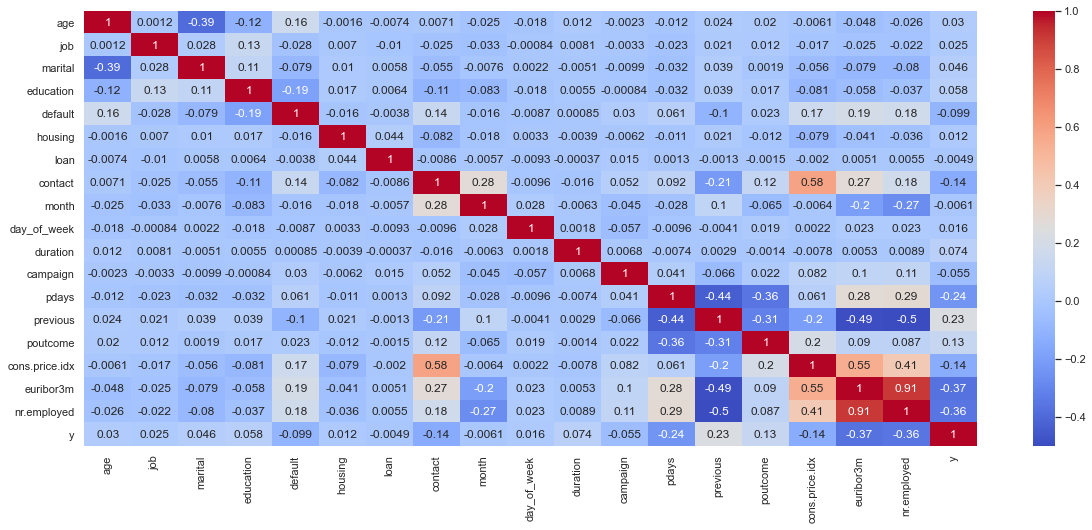

In [55]:
plt.figure(figsize=(20,8))
sns.heatmap(mydata_corr,annot=True,cmap='coolwarm')
plt.show()

# Pairplot

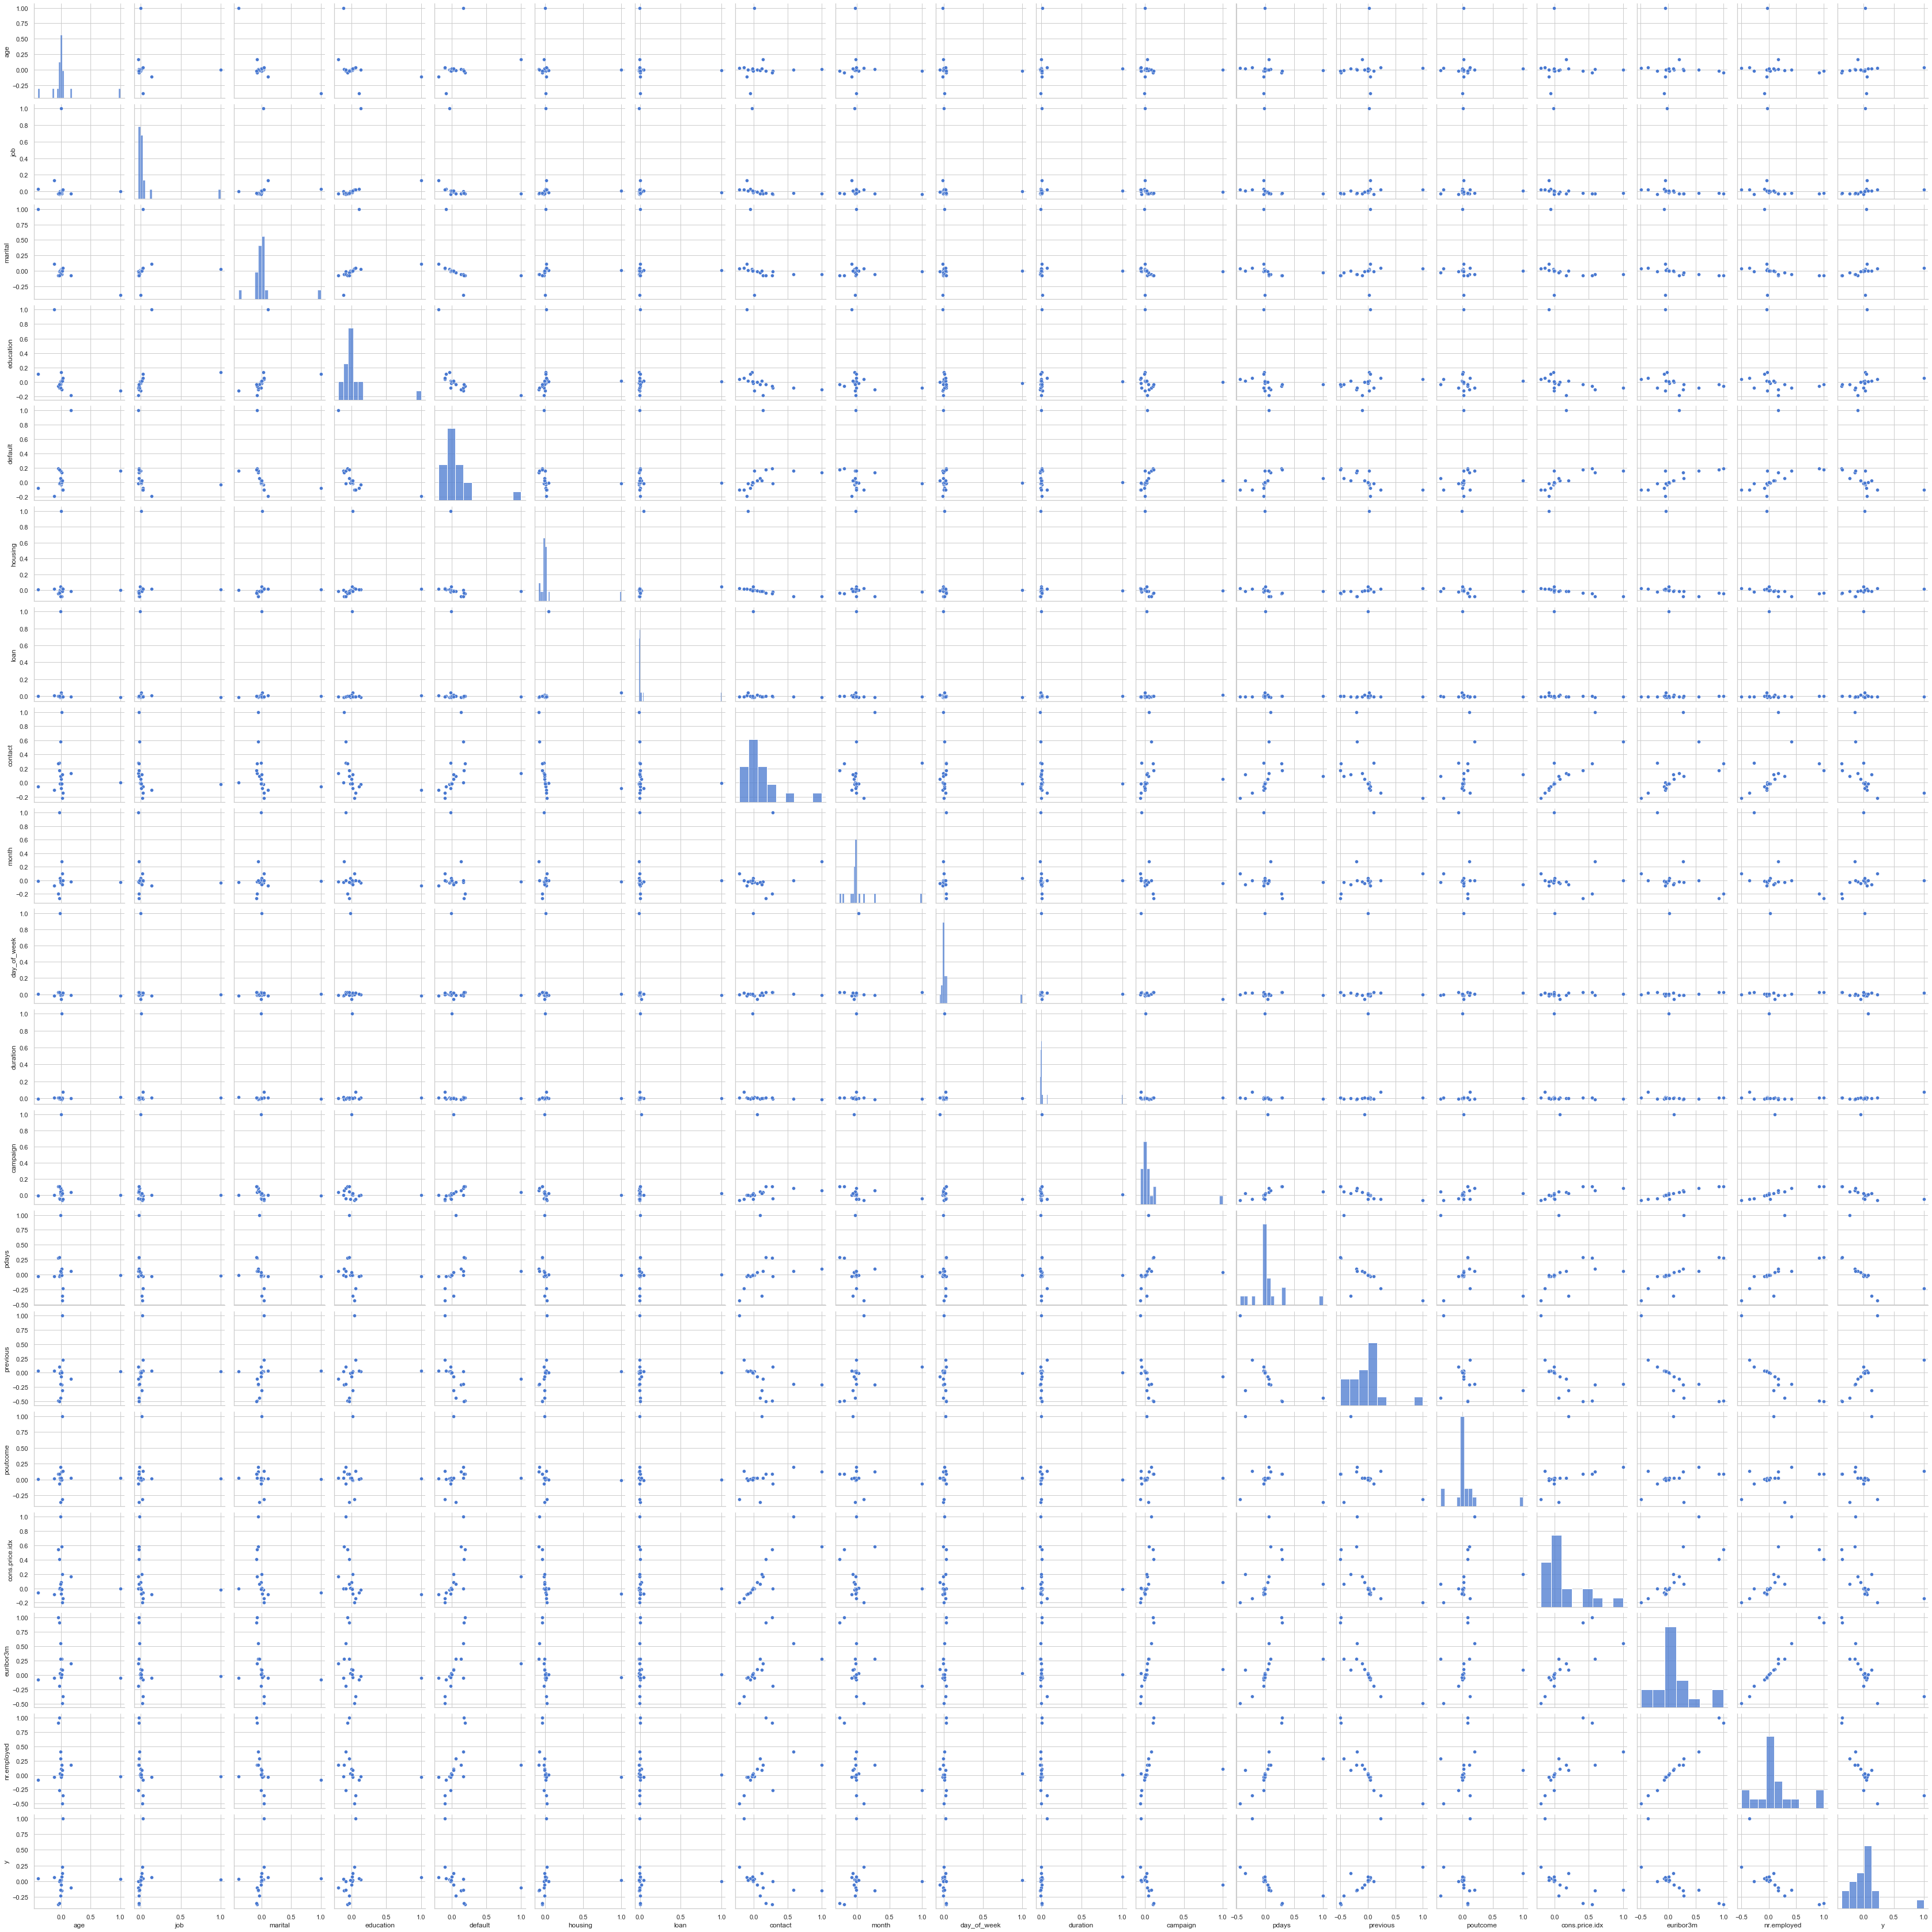

In [54]:
sns.pairplot(mydata_corr)

# Seperating the Dependant and Independant Variables

# Dependant Variable

In [56]:
y_dep=mydata.y
y_dep

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

# Independant variable

In [57]:
x_ind=mydata.drop('y',axis=1)
x_ind

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,euribor3m,nr.employed
0,39,3,1,0,0,0,0,1,6,1,707,0,26,0,1,18,287,8
1,40,7,1,3,1,0,0,1,6,1,418,0,26,0,1,18,287,8
2,20,7,1,3,0,2,0,1,6,1,656,0,26,0,1,18,287,8
3,23,0,1,1,0,0,0,1,6,1,432,0,26,0,1,18,287,8
4,39,7,1,3,0,0,2,1,6,1,766,0,26,0,1,18,287,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,803,0,26,0,1,25,171,0
41184,29,1,1,5,0,0,0,0,7,0,863,0,26,0,1,25,171,0
41185,39,5,1,6,0,2,0,0,7,0,574,11,26,0,1,25,171,0
41186,27,9,1,5,0,0,0,0,7,0,930,0,26,0,1,25,171,0


# Split The Dataset in to train and test

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)

# Before Normalization

# x_train

<AxesSubplot:ylabel='Density'>

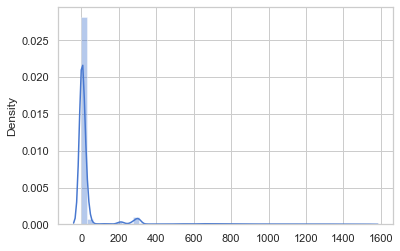

In [62]:
sns.distplot(x_train)

# x_test

<AxesSubplot:ylabel='Density'>

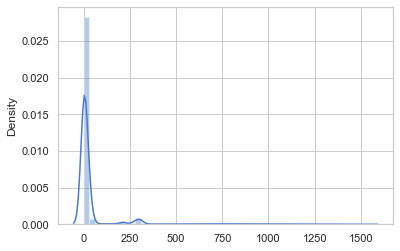

In [63]:
sns.distplot(x_test)

# Standard Scalar

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
norm = StandardScaler()

In [67]:
x_train = norm.fit_transform(x_train)

# x_train After Normalization

<AxesSubplot:ylabel='Density'>

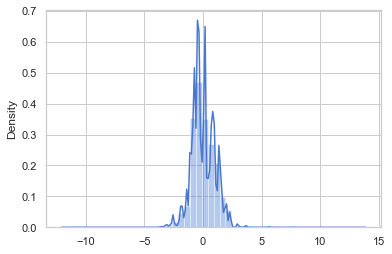

In [68]:
sns.distplot(x_train)

In [69]:
x_test = norm.fit_transform(x_test)

# x_test After Normalization

<AxesSubplot:ylabel='Density'>

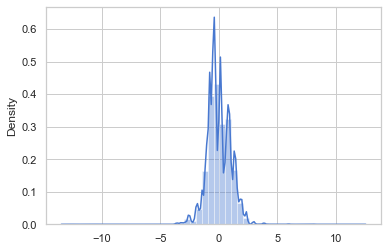

In [70]:
sns.distplot(x_test)

# Training data using SVM

In [71]:
from sklearn.svm import SVC

# Create a Model with Linear Kernel

In [72]:
model=SVC(kernel='linear')

# Fit the Model

In [73]:
f_model=model.fit(x_train,y_train)

# Machine Predicted

In [74]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test,y_pred)

array([[7224,   94],
       [ 736,  184]], dtype=int64)

# Accuracy Score

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(y_test,y_pred)

0.8992473901432386

The Accuracy of the Model is 0.8992473901432386 (90%)

# Check for n_support

In [79]:
f_model.n_support_

array([6739, 3542])

In the Model, the dependant Data 0 has 6739 and 1 has 3542

# Classification report

In [80]:
from sklearn.metrics import classification_report

In [81]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7318
           1       0.66      0.20      0.31       920

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.63      8238
weighted avg       0.88      0.90      0.87      8238



# Hyper parameter tuning

In [83]:
kernel=['linear','rbf','poly','sigmoid']

# Check with all the Kernels which gives a better Accuracy

In [84]:
for i in kernel:
    model1=SVC(kernel=i)
    model1=model1.fit(x_train,y_train)
    print('kernel:',i)
    print('Accuracy Score:',accuracy_score(y_test,model1.predict(x_test)))

kernel: linear
Accuracy Score: 0.8992473901432386
kernel: rbf
Accuracy Score: 0.9032532168001942
kernel: poly
Accuracy Score: 0.9032532168001942
kernel: sigmoid
Accuracy Score: 0.8373391599902889


# By checking with Hyper Parameter Tuning the best kernel is Radial Basis Function with an accuracy of 0.9032532168001942 (90%)